# <center style="color: blue"><mark><b>WEATHER PREDICTION</b></mark></center>

# <img src="forecast.jpg" alt="" width="800" height="400">

# Project Overview

Our project is about <i>weather prediction</i>. Here we will predict whether it will rain or not using some weather conditions. We have collected our dataset from <a href="https://www.kaggle.com">Kaggle</a>. There are six attributes in our dataset. They are—<mark><i>date</i></mark>, <mark><i>precipitation</i></mark>, <mark><i>temp_max</i></mark>, <mark><i>temp_min</i></mark>, <mark><i>wind</i></mark>, and <mark><i>weather</i></mark>. Where the first five are independent variables and the last one is the dependent variable. The weather attribute contains 5 different classes—drizzle, rain, sun, snow, and fog. We have visualized the dataset with different plotting for checking the outliers or skew. 

We have done some preprocessing and standardization using <b>DataFrame.Quantile()</b> and <b>StandardScale()</b>.
As it is a classification problem, we have trained different ML classification and regression models with the dataset. Namely, <a href="https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.">Support Vector Machine (SVM)</a>, <a href="https://scikit-learn.org/stable/modules/tree.html#:~:text=Decision%20Trees%20(DTs)%20are%20a,as%20a%20piecewise%20constant%20approximation.">Decision Tree (DT)</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression (LR)</a>, <a href="https://scikit-learn.org/stable/modules/neighbors.html">K-Nearest Neighbors (KNN)</a>, and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">Naive Bayes (NB)</a>. 

After comparing all the models, <mark style="background-color: green; color: white">SVM & KNN achieved the best score, which is 82.26%</mark>. In contrast, DT provides the lowest score, 70.16%. 

# Importing The Required Libraries

In [1]:
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.metrics import classification_report

# Dataset Overview

<h4>About Dataset</h4>

There are six attributes in our dataset. They are—<mark><i>date</i></mark>, <mark><i>precipitation</i></mark>, <mark><i>temp_max</i></mark>, <mark><i>temp_min</i></mark>, <mark><i>wind</i></mark>, and <mark><i>weather</i></mark>. Where the first five are independent variables and the last one is the dependent variable. 

Let’s describe how this data set work to predict the weather-
<ul>
<li>Date -- We use the date for check how much rain occur in one month and which month it occurs more.So that every year we be aware that this month rain may occur or not.</li>
<li>Precipitation -- It means product of the condensation of atmospheric water.All the forms in which water falls on the land surface and open water bodies as rain,sleet,snow,hail or drizzle.</li>
<li>Temp_max,Temp_min -- Predict the maximum temperature and minimum temperature.As we know rainfall and temperature are important climatic inputs for agricultural production,especially in the context of climate change.However,accurate analysis and simulation of the joint distribution of rainfall and temperature are difficult due to possible interdependence between them.And the physical rationale behind the relationship between rainfall and temperature is that rainfall may affect soil moisture which may in turn affect surface temperature by controlling the partitioning between the sensible and heat.</li>
<li>Wind -- wind speed</li>
<li>Weather -- As we are going to predict the weather condition. Those are- drizzle,rain,sun,snow,fog.</li>
</ul>

<h4>Dataset link</h4>

The dataset available in https://www.kaggle.com/datasets/ananthr1/weather-prediction

<h3>Loading the dataset</h3>

In [2]:
dataset = pd.read_csv('./Dataset/seattle-weather.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
dataset.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


# Data Preprocessing and Exploratory data analysis

There are **6 Variables** in this Dataset:
* **4 Continuous** Variables.
* **1 Variable** to accommodate the Date.
* **1 Variable** refers the Weather.

<h3> Data Exploration </h3>

In [5]:
dataset.shape

(1461, 6)

As of it has **6 Columns** with total of **1461 Rows** as our observations in the Data set. 

In [6]:
#convert the data type into datetime
dataset['date'] = pd.to_datetime(dataset['date'])

In [7]:
dataset.groupby('weather').size()

weather
drizzle     53
fog        101
rain       641
snow        26
sun        640
dtype: int64

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

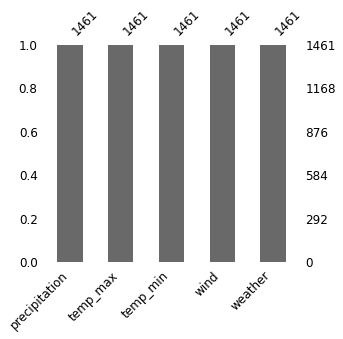

In [10]:
plt.figure(figsize=(10,4))
axz=plt.subplot(1,2,2)
mso.bar(dataset.drop(["date"],axis=1),ax=axz,fontsize=12);

**Checking for Null values in the data set**

The below plot shows that all the columns in the data set ***doesn't contains Null values*** as each columns contains a ***total of 1461*** observations.

In [11]:
cols = list(dataset.columns)
print(cols)

['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']


It is the process of Exploring the data from the **"RAW"** data set that we have taken or Imported.

First let us Deal with the Categorical variables 

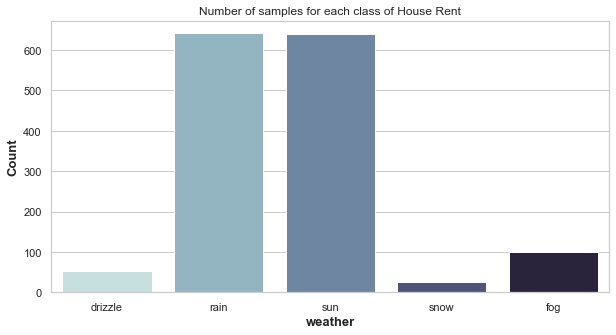

In [12]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.countplot(x = 'weather',data = dataset,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.title("Number of samples for each class of House Rent")
plt.show()

In [13]:
countrain=len(dataset[dataset.weather=="rain"])
countsun=len(dataset[dataset.weather=="sun"])
countdrizzle=len(dataset[dataset.weather=="drizzle"])
countsnow=len(dataset[dataset.weather=="snow"])
countfog=len(dataset[dataset.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(dataset.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(dataset.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(dataset.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(dataset.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(dataset.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


From the Above countplot the data set contains higher amount of data with the weather datail of ***Rain and Sun*** and it also have some additionals like ***drizzle,snow and fog*** .

<h4>NUMERICAL OR CONTINUOUS VARIABLES</h4>

  Next we will explore the ***Continuous variables***

In [14]:
dataset.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Distribution of numerical value using ***Histogram and Violin plot .***

<AxesSubplot:xlabel='wind', ylabel='Count'>

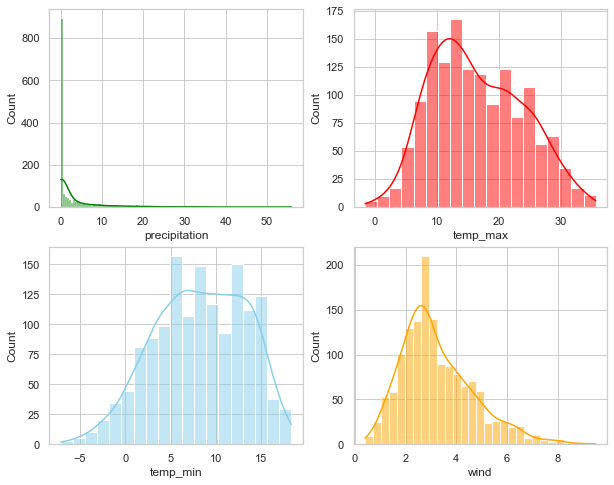

In [15]:
sns.set(style="whitegrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=dataset,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=dataset,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=dataset,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=dataset,x="wind",kde=True,ax=axs[1,1],color='orange')

From the above distribution it is clear that **precipitation and wind** are **Positively skewed.**

And **temp_min** is **Negatively skewed** and both has some***outliers.***

# **HOW TO FIND THE OUTILERS OR SKEW IN DATA SET?**


* ***We can find the outliers in the dataset by using following plots:***

  1.**Hist plot**
  
  2.**Box plot**
  
  3.**Violin plot**
  
  4.**Dist plot**
yet both ***box and violin plots*** are easier to handel with.

<AxesSubplot:xlabel='wind'>

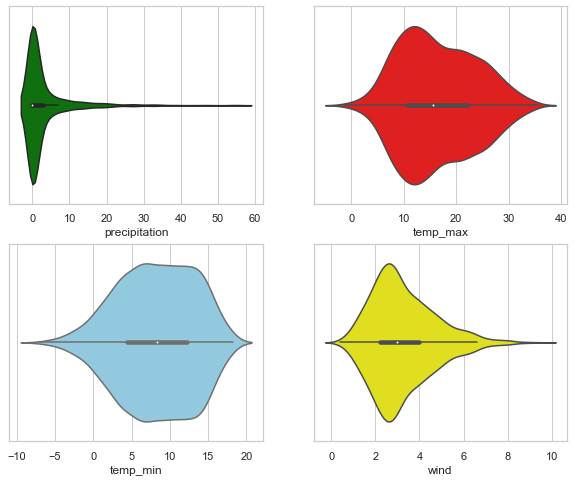

In [16]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=dataset,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=dataset,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=dataset,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=dataset,x="wind",kde=True,ax=axs[1,1],color='yellow')

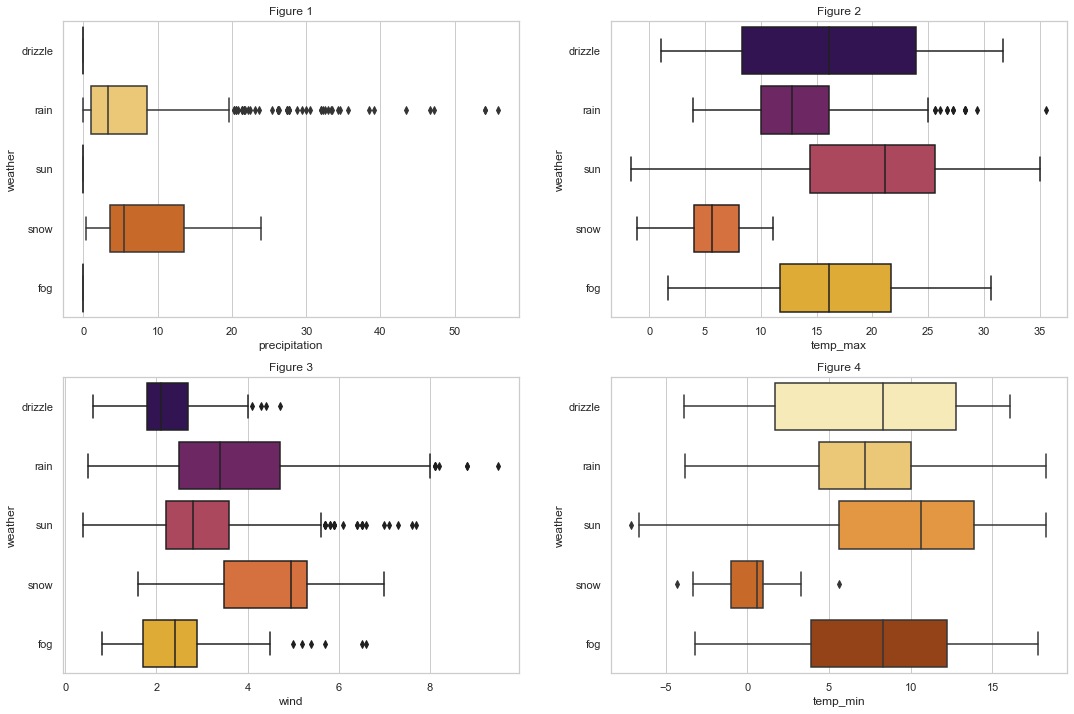

In [17]:
fig,axs=plt.subplots(2,2,figsize=(18,12))
sns.boxplot(x="precipitation",y="weather",data=dataset,ax=axs[0,0],palette="YlOrBr").set(title="Figure 1")
sns.boxplot(x="temp_max",y="weather",data=dataset,ax=axs[0,1],palette="inferno").set(title="Figure 2")
sns.boxplot(x="wind",y="weather",data=dataset,ax=axs[1,0],palette="inferno").set(title="Figure 3")
sns.boxplot(x="temp_min",y="weather",data=dataset,ax=axs[1,1],palette="YlOrBr").set(title="Figure 4")
plt.show()

**For figure-1:**
From the above box plot between the ***Weather and Precipitation*** 
the value ***Rain*** has many **positive outliers** and both **Rain and Snow** were ***positively skewed/has positive skewness***.

**For figure-3:**
From the above box plots ,we came to know that Every ***attribute of weather*** has some ***positive outliers** and it is ***both types of skewness***.

**For figure-4:**
here some data has ***negative*** and some have both ***positive and negative*** outliers and ***snow is negatively skewed.
***SKEWNESS AND ITS CORRECTIONS:***

From the above ***Violin plot*** we can clearly understand the Skewness of the Data as the **TAIL** indicates the skewness.

*BELOW DIAGRAM SHOWS THE EXACT OF HOW THE* **SKEWNESS LOOKS:**
![download.png](download.png "Skewness looks")

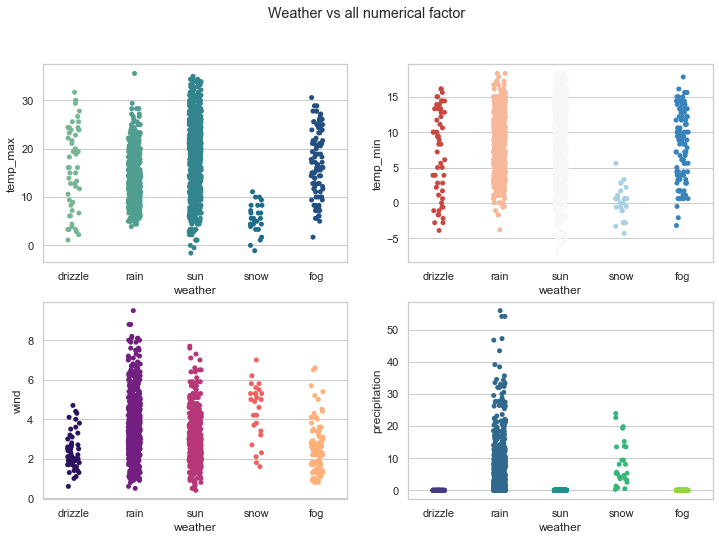

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Weather vs all numerical factor')
sns.stripplot(ax=axes[0, 0], x='weather',y ='temp_max',data=dataset,palette="crest",jitter=True, dodge=True)
sns.stripplot(ax=axes[0, 1], x='weather',y ='temp_min',data=dataset,palette = "RdBu",jitter=True, dodge=True)
sns.stripplot(ax=axes[1, 0], x='weather',y ='wind',data=dataset,palette = "magma",jitter=True, dodge=True)
sns.stripplot(ax=axes[1, 1], x='weather',y ='precipitation',data=dataset,palette = "viridis",jitter=True, dodge=True)
plt.show()

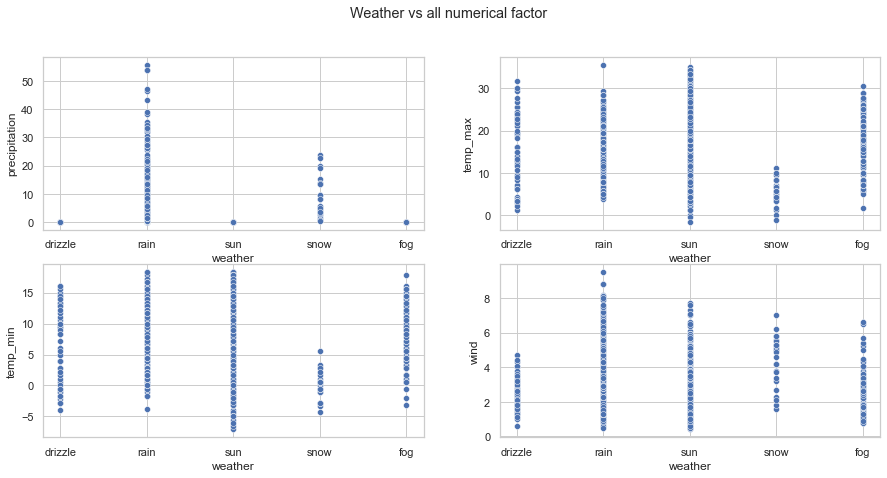

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

fig.suptitle('Weather vs all numerical factor')

sns.scatterplot(ax=axes[0, 0], data=dataset, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=dataset, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=dataset, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=dataset, x='weather', y='wind')
plt.show()

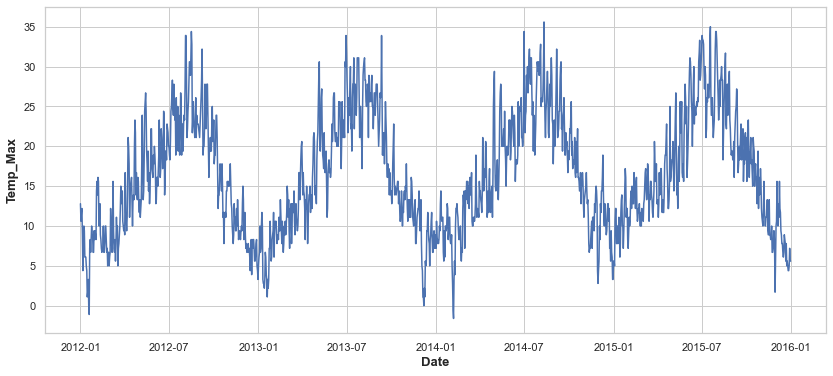

In [20]:
plt.figure(figsize=(14,6))
sns.lineplot(x = 'date',y='temp_max',data=dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

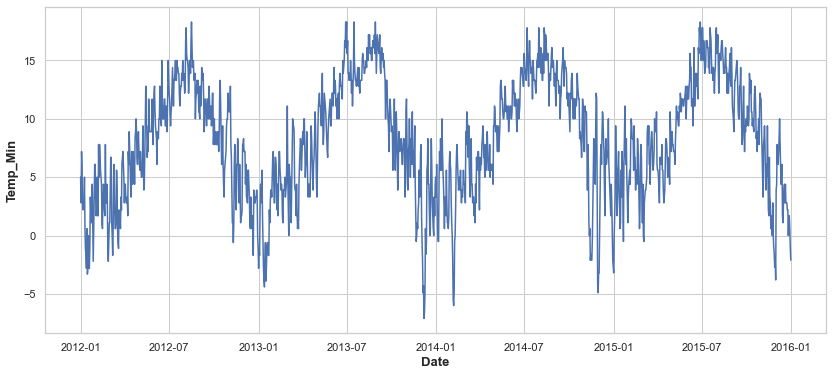

In [21]:
plt.figure(figsize=(14,6))
sns.lineplot(x = 'date',y='temp_min',data=dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Min",fontweight='bold',size=13)
plt.show()

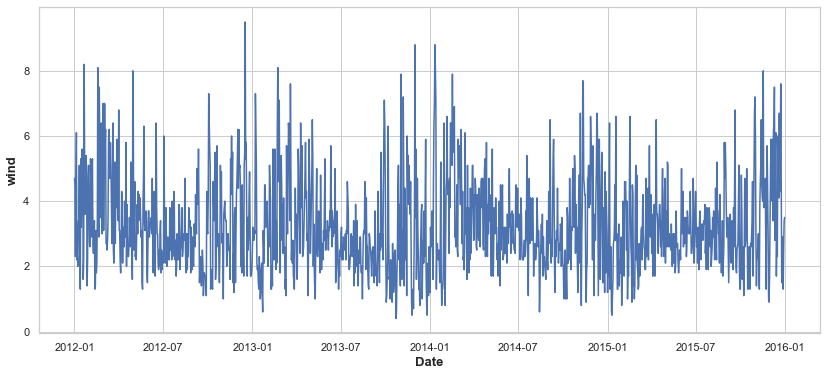

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(x = 'date',y='wind',data=dataset)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("wind",fontweight='bold',size=13)
plt.show()

**Heatmap**

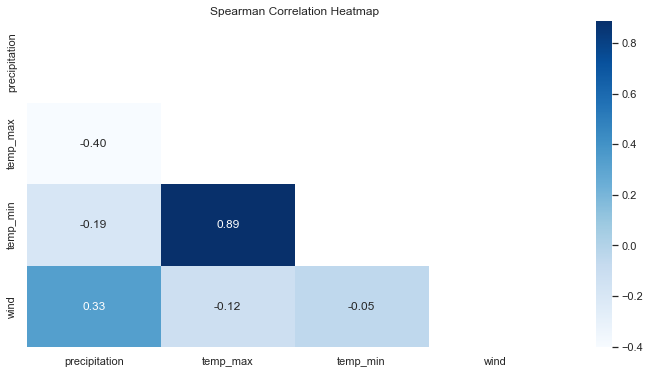

In [23]:
corr = dataset.corr(method = 'spearman')
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(corr)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (12, 6))
# "annot = True" to print the values inside the square
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)
plt.title('Spearman Correlation Heatmap');

There is a ***positive correlation*** between ***temp_max and temp_min***.

In [24]:
print(dataset.apply(lambda x: x.nunique()))
dataset.describe().T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("vlag", as_cmap=True))

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64


,count,mean,std,min,25%,50%,75%,max
precipitation,1461.000000,3.029432,6.680194,0.000000,0.000000,0.000000,2.800000,55.900000
temp_max,1461.000000,16.439083,7.349758,-1.600000,10.600000,15.600000,22.200000,35.600000
temp_min,1461.000000,8.234771,5.023004,-7.100000,4.400000,8.300000,12.200000,18.300000
wind,1461.000000,3.241136,1.437825,0.400000,2.200000,3.000000,4.000000,9.500000


<Figure size 1152x576 with 0 Axes>

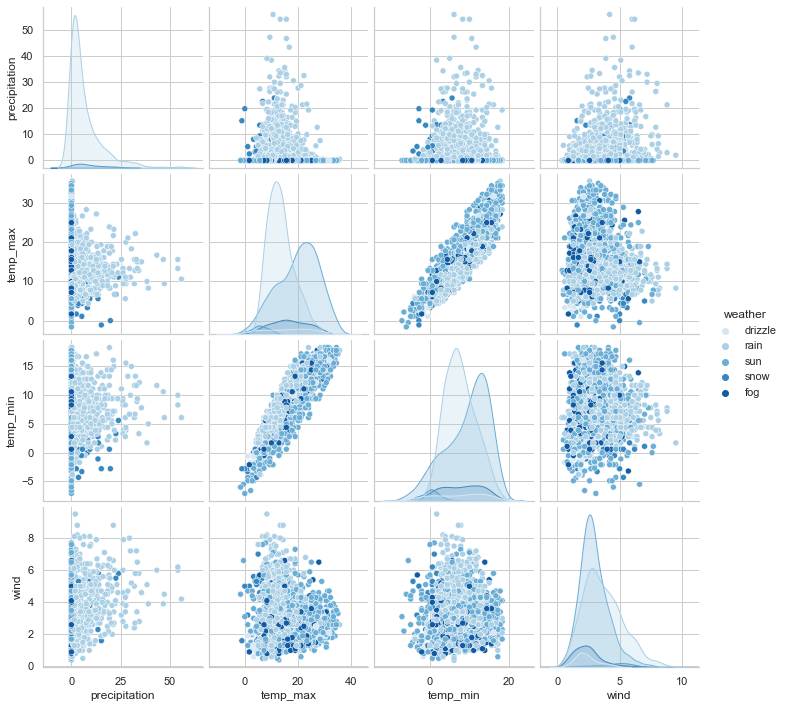

In [25]:
plt.figure(figsize=(16,8))
sns.pairplot(dataset.drop('date',axis=1),hue='weather',palette="Blues")
plt.show()

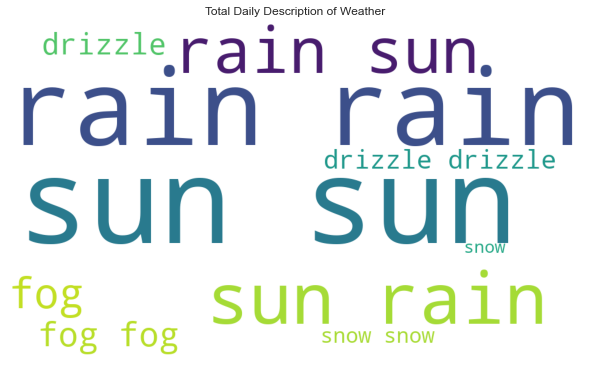

In [26]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in dataset["weather"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    pass
 
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.gca().set_title('Total Daily Description of Weather')
plt.show() 

# Data Preprocessing

**Drop Unnecessary Variables**

In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [27]:
df = dataset.drop(['date'],axis=1)

***Scaling the weather variables using label Encoder:***

In [28]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    dataset[c1]= label_encoder.fit_transform(dataset[c1])
    dataset[c1].unique()
LABEL_ENCODING("weather")
dataset

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [29]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_16568/2492161268.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


In [30]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<h4>SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES</h4>

In [31]:
X=df.drop(['weather'], axis=1)
y=df["weather"].values
X

,precipitation,temp_max,temp_min,wind
0,0.000000,12.8,5.0,2.167948
2,0.894427,11.7,7.2,1.516575
4,1.140175,8.9,2.8,2.469818
5,1.581139,4.4,2.2,1.483240
6,0.000000,7.2,2.8,1.516575
...,...,...,...,...
1455,0.000000,4.4,0.0,1.581139
1457,1.224745,5.0,1.7,1.140175
1458,0.000000,7.2,0.6,1.612452
1459,0.000000,5.6,-1.0,1.843909


**Standardization** is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

* mean - 0 (zero)
* standard deviation - 1

Here's the formula for Standarization:
![std.png](Standardization.png "Standardization formula")

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.60933199, -0.5794075 , -0.66479802,  1.34668256],
       [ 0.57361988, -0.72521075, -0.23932352, -0.49985515],
       [ 0.89864167, -1.09634631, -1.09027252,  2.20243364],
       ...,
       [-0.60933199, -1.32167861, -1.51574702, -0.2280609 ],
       [-0.60933199, -1.53375608, -1.82518302,  0.42808319],
       [-0.60933199, -1.53375608, -2.03792027,  0.50439647]])

***Spliting the Dataset into train & test***

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1109, 4)
X_test shape:  (124, 4)
y_train shape:  (1109,)
y_test shape:  (124,)


# Model Development

The ***Machine learning Models used*** are:

    1.K-Nearest Neighbour(KNN)
    2.Support Vector Machine(SVM)
    3.Decision Tree (DT)
    4.Logistic Regression (LR)
    5.Naive Bayes (NB)

* **Support Vector Machine (SVM)**

In [34]:
from sklearn import svm
from sklearn import metrics
model_svm = svm.SVC(kernel = 'linear', random_state= 1) #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.8226
----------------------------------


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction_svm)
print(cm)

[[ 0  0  0  5]
 [ 0  0  0 11]
 [ 0  0 27  6]
 [ 0  0  0 75]]


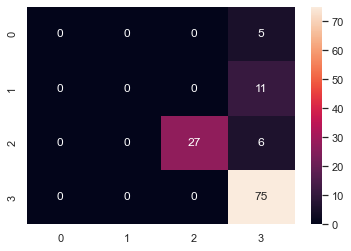

In [36]:
sns.heatmap(cm,annot=True)
plt.show()

In [37]:
print(classification_report(y_test, y_prediction_svm, zero_division=0))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         5
         fog       0.00      0.00      0.00        11
        rain       1.00      0.82      0.90        33
         sun       0.77      1.00      0.87        75

    accuracy                           0.82       124
   macro avg       0.44      0.45      0.44       124
weighted avg       0.73      0.82      0.77       124



* **Decision Tree (DT)**

In [38]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=5)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.7016
---------------------------------


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction_dt)
print(cm)

[[ 1  0  0  4]
 [ 1  2  1  7]
 [ 1  3 27  2]
 [ 6  8  4 57]]


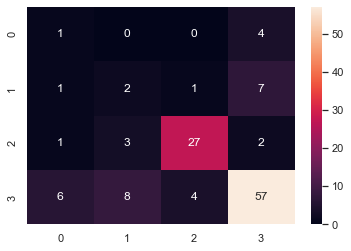

In [40]:
sns.heatmap(cm,annot=True)
plt.show()

In [41]:
print(classification_report(y_test, y_prediction_dt, zero_division=0))

              precision    recall  f1-score   support

     drizzle       0.11      0.20      0.14         5
         fog       0.15      0.18      0.17        11
        rain       0.84      0.82      0.83        33
         sun       0.81      0.76      0.79        75

    accuracy                           0.70       124
   macro avg       0.48      0.49      0.48       124
weighted avg       0.74      0.70      0.72       124



* **K-Nearest Neighbors (KNN) Classifier**

In [42]:
 # importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
k_score=[]
for k in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=k) # 12 neighbours for putting the new data into a class
    model_knn.fit(X_train, y_train) #train the model with the training dataset
    y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
    # checking the accuracy of the algorithm. 
    # by comparing predicted output by the model and the actual output
    score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
    k_score.append(score_knn)
    
k = k_score.index(max(k_score))+1

#Train the model with the best k value
model_knn = KNeighborsClassifier(n_neighbors=k) # 12 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
k_score.append(score_knn)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.8226
----------------------------------


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction_knn)
print(cm)

[[ 0  0  0  5]
 [ 1  0  0 10]
 [ 0  0 27  6]
 [ 0  0  0 75]]


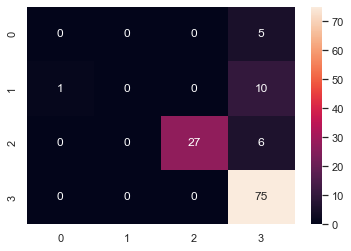

In [44]:
sns.heatmap(cm,annot=True)
plt.show()

In [45]:
print(classification_report(y_test, y_prediction_knn, zero_division=0))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         5
         fog       0.00      0.00      0.00        11
        rain       1.00      0.82      0.90        33
         sun       0.78      1.00      0.88        75

    accuracy                           0.82       124
   macro avg       0.45      0.45      0.44       124
weighted avg       0.74      0.82      0.77       124



* **Logistic Regression (LR)**

In [46]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.8145
---------------------------------


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction_lr)
print(cm)

[[ 0  0  0  0  5]
 [ 0  0  0  0 11]
 [ 0  0 27  0  6]
 [ 0  0  0  0  0]
 [ 0  0  0  1 74]]


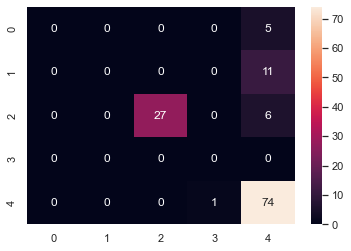

In [48]:
sns.heatmap(cm,annot=True)
plt.show()

In [49]:
print(classification_report(y_test, y_prediction_lr, zero_division=0))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         5
         fog       0.00      0.00      0.00        11
        rain       1.00      0.82      0.90        33
        snow       0.00      0.00      0.00         0
         sun       0.77      0.99      0.87        75

    accuracy                           0.81       124
   macro avg       0.35      0.36      0.35       124
weighted avg       0.73      0.81      0.76       124



* **Naive Bayes (NB)**

In [50]:
 # importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.7984
---------------------------------


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction_nb)
print(cm)

[[ 1  1  0  0  3]
 [ 0  1  0  0 10]
 [ 0  0 26  1  6]
 [ 0  0  0  0  0]
 [ 1  3  0  0 71]]


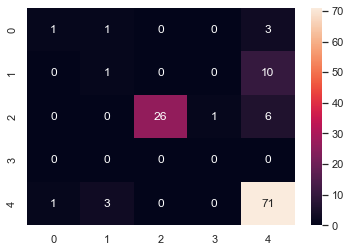

In [52]:
sns.heatmap(cm,annot=True)
plt.show()

In [53]:
print(classification_report(y_test, y_prediction_nb, zero_division=0))

              precision    recall  f1-score   support

     drizzle       0.50      0.20      0.29         5
         fog       0.20      0.09      0.13        11
        rain       1.00      0.79      0.88        33
        snow       0.00      0.00      0.00         0
         sun       0.79      0.95      0.86        75

    accuracy                           0.80       124
   macro avg       0.50      0.41      0.43       124
weighted avg       0.78      0.80      0.78       124



<h4>CHECKING FOR THE USER INPUT:</h4>

In [54]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=model_svm.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Sun


**Create visualization for all model with their Accuracy**

In [55]:
score = list(score)
model_list = []
acc = []
for i in score:
    model_list.append(i[0])
    acc.append(i[1])
model_list

['LR', 'SVM', 'KNN', 'NB', 'DT']

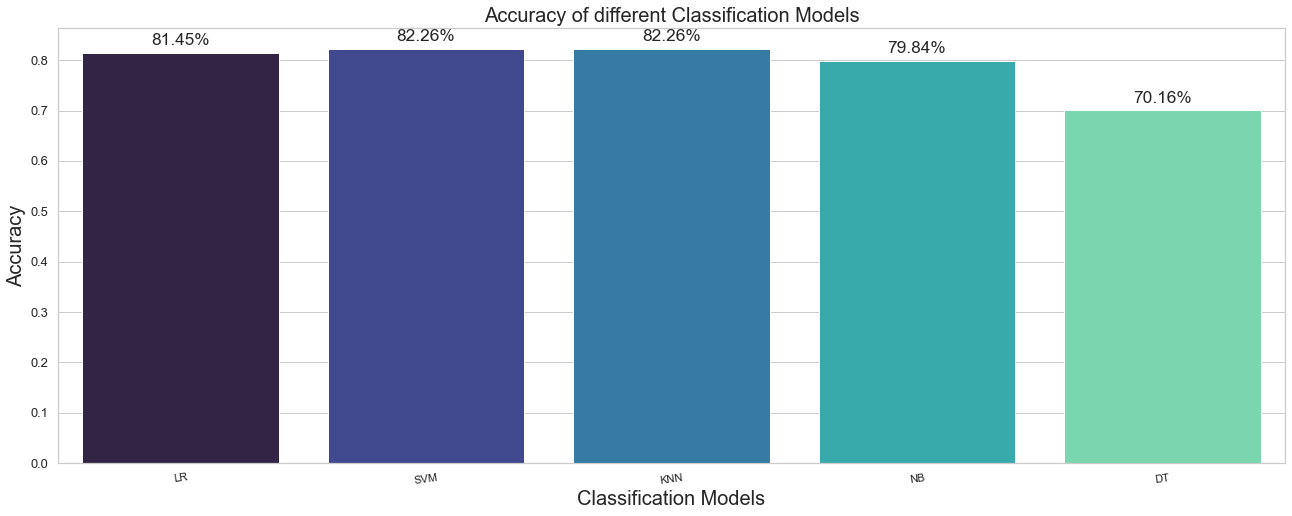

In [56]:
plt.rcParams['figure.figsize']=8,6
plt.figure(figsize=(22,8))
ax = sns.barplot(x=model_list, y=acc, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Discussion and Conclusion

The purpose of this project was to find a suitable classifier for weather prediction which will classify weather as accurately as possible.After applying 5 different model we can see that for this particular dataset, **KNN and Kernel SVM** have **performed better than the rest**. So we can shortlist these 2 to work on this project. This is exactly the same conclusion we arrived at by training each of those algorithms individually.